In [1]:
path = "/content/drive/My Drive/colab/trump/tweets_11-06-2020.csv"

In [2]:
# Import the libraries
import tweepy #Para conectarse a twitter, no la pcupo
from textblob import TextBlob #contiene funciones de analisis de sentimientos y polaridad
from wordcloud import WordCloud #para obtener la nube de palabras
import pandas as pd
import numpy as np 
import re #para usar regex
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Get the data
df = pd.read_csv(path)
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['text'] = df['text'].apply(cleanTxt)

# Show the cleaned tweets
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50
2,1218010753434820614,_Herridge: READ: Letter to surveillance court ...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58
4,1218159531554897920,: Very friendly telling of events here about C...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,Subjectivity,Polarity
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,0.200000,0.200000
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,0.483333,0.458929
2,1218010753434820614,_Herridge: READ: Letter to surveillance court ...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,0.300000,0.050000
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,0.454762,0.021131
4,1218159531554897920,: Very friendly telling of events here about C...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,0.500000,0.268750


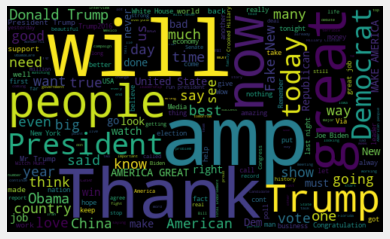

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,Subjectivity,Polarity,Analysis
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48,0.200000,0.200000,Positive
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,0.483333,0.458929,Positive
2,1218010753434820614,_Herridge: READ: Letter to surveillance court ...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,0.300000,0.050000,Positive
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,0.454762,0.021131,Positive
4,1218159531554897920,: Very friendly telling of events here about C...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,0.500000,0.268750,Positive


In [14]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, 200): #First 20
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j=j+1

Printing negative tweets:

1) Getting a little exercise this morning! 

2) : Vindman's behavior is a scandal. He should be removed from the  White House ASAP to protect our foreign poli…

3) Nobody is showing up for Obama’s hate laced speeches. 47 people! No energy, but still better than Joe!

4) Just landed in Ohio. See you in a little while!

5) : People ask why the President fights so hard in court for ballot integrity?  Why we have such an extensive Election Day Oper…

6) What a terrible thing for Biden to say! Rigged Election? 

7) Law Enforcement is watching and involved. So dishonest! 

8) As long as I am President, I will always stand with the HEROES of Law Enforcement! Joe Biden won’t. 

9) : Here is the Burisma email  referenced about 'closing down any cases.'

We need to bring the focus back to t…

10) : . &amp; Barack Obama killed the coal industry and if elected he will come after oil &amp; gas!  is a ch…

11) : We don't build walls because we hate the people on the outsid

In [16]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, 200):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1

Printing positive tweets:

1) Republicans and Democrats have both created our economic problems.

2) I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST! Thank you for a wonderful evening!! KAG2020 

3) _Herridge: READ: Letter to surveillance court obtained by CBS News questions where there will be further disciplinary action and cho…

4) The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it. Almost all recent elections using this system, even though much smaller &amp;  with far fewer Ballots to count, have ended up being a disaster. Large numbers of missing Ballots &amp; Fraud!

5) : Very friendly telling of events here about Comey's apparent leaking to compliant media. If you read those articles and tho…

6) : President  announced historic steps to protect the Constitutional right to

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()